In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

In [2]:
df = pd.read_csv('cfpdss_m0.5.csv')
df

,Unnamed: 0,c5,c6,c7,c8,c9,n0,n1,n2,n3,n4,class
0,0,a,a,b,a,a,0.448573,1.212644,2.555515,0.242702,0.697604,0
1,1,a,a,a,b,b,1.902515,-0.467349,-0.744523,-0.017156,-0.380288,0
2,2,a,a,a,b,b,0.825045,1.002267,1.972207,-0.790095,0.233456,1
3,3,a,a,a,b,b,-0.124974,0.902601,1.696092,-0.320182,0.243261,0
4,4,b,a,a,b,a,-1.259765,0.793134,1.547527,-2.132172,-0.788367,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,12995,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12996,12996,a,a,a,a,NaN,NaN,-0.629300,-1.315978,0.856377,NaN,0
12997,12997,b,b,NaN,a,b,NaN,NaN,NaN,NaN,NaN,1
12998,12998,a,NaN,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,0


In [3]:
categorical_features = ['c5', 'c6', 'c7', 'c8', 'c9']
numerical_features = ['n0', 'n1', 'n2', 'n4', 'n4']

encoded_df = df.copy()
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column].astype(str))
    label_encoders[column] = le

combined_df = encoded_df[categorical_features + numerical_features + ['class']]
combined_df

,c5,c6,c7,c8,c9,n0,n1,n2,n4,n4,class
0,0,0,1,0,0,0.448573,1.212644,2.555515,0.697604,0.697604,0
1,0,0,0,1,1,1.902515,-0.467349,-0.744523,-0.380288,-0.380288,0
2,0,0,0,1,1,0.825045,1.002267,1.972207,0.233456,0.233456,1
3,0,0,0,1,1,-0.124974,0.902601,1.696092,0.243261,0.243261,0
4,1,0,0,1,0,-1.259765,0.793134,1.547527,-0.788367,-0.788367,1
...,...,...,...,...,...,...,...,...,...,...,...
12995,2,2,1,2,2,NaN,NaN,NaN,NaN,NaN,0
12996,0,0,0,0,2,NaN,-0.629300,-1.315978,NaN,NaN,0
12997,1,1,2,0,1,NaN,NaN,NaN,NaN,NaN,1
12998,0,2,2,2,1,NaN,NaN,NaN,NaN,NaN,0


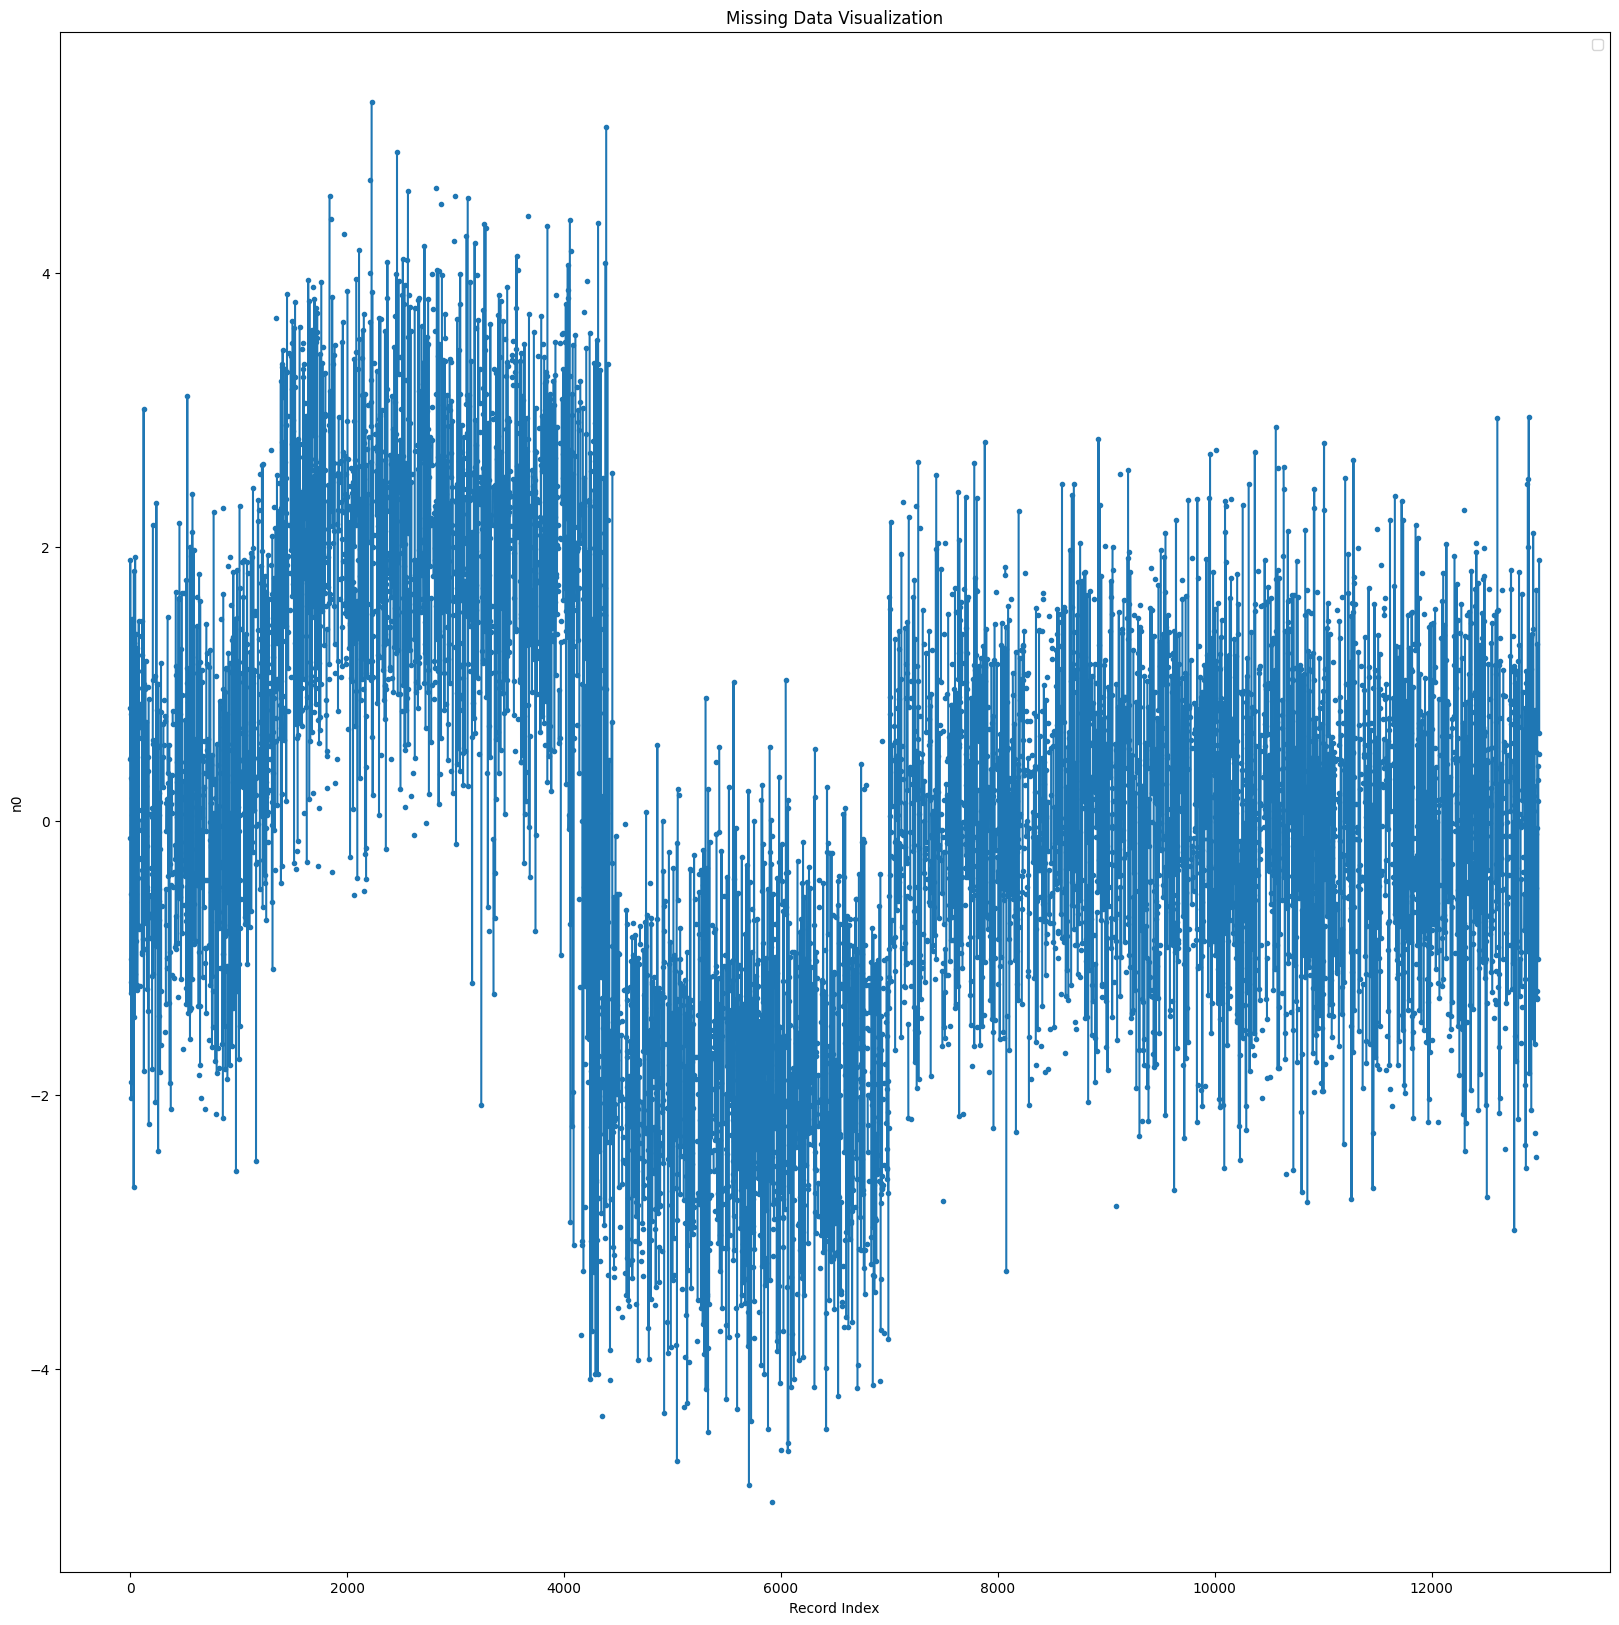

In [7]:
plt.figure(figsize = (20,20))
plt.plot(df.index, df['n0'], label='', marker='.')
plt.xlabel('Record Index')
plt.ylabel('n0')
plt.title('Missing Data Visualization')
plt.legend()
plt.show()

In [17]:
def plot_records(start, end):
    plt.figure(figsize = (5,5))
    plt.plot(df.iloc[start:end].index, df.iloc[start:end]['n4'], label='Feature n4', marker='.')
    plt.xlabel('Record Index')
    plt.ylabel('Feature')
    plt.title('Missing data Visualization')
    plt.legend()
    plt.show()

interactive_plot = interactive(plot_records, start=(0, len(df), 1), end=(0, len(df), 1))
output = interactive_plot.children[-1]
output.layout.height = '500px'
output.layout.width = '800px'
display(interactive_plot)

interactive(children=(IntSlider(value=6500, description='start', max=13000), IntSlider(value=6500, description…

In [16]:
def plot_records(start, end):
    plt.figure(figsize = (5,5))
    plt.plot(df.iloc[start:end].index, df.iloc[start:end]['c9'].apply(lambda x: 1 if x == 'a' else 2 if x == 'b' else 0))
    plt.xlabel('Record Index')
    plt.ylabel('Category (a=1, b=2, missing=0)')
    plt.title('Category Distribution for c9')
    plt.show()

interactive_plot = interactive(plot_records, start=(0, len(df), 1), end = (0, len(df), 1))
output = interactive_plot.children[-1]
output.layout.height = '500px'
output.layout.width = '800px'
display(interactive_plot)

interactive(children=(IntSlider(value=6500, description='start', max=13000), IntSlider(value=6500, description…